## Notes

### Import libraries and read data

In [118]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

#input_data_ordered_raw =  pd.read_csv('rnap_scanned_over_ecoli_genome200k.csv')
input_data_ordered_raw = pd.read_csv('GFPdata.tsv',sep='\t')
#sequences = input_data_ordered_raw['seq'].tolist()

In [274]:
input_data_ordered_raw.head()

,AAsequence,HammingDistance,aaMutations,medianBrightness,std
0,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,NaN,3.719212,0.106992
1,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1,SA108D,1.301030,NaN
2,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,5,SA108D:SN144D:SI186V:SM231T:SL234P,1.301031,NaN
3,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,4,SA108D:SY141N:SH146L:SE220G,1.301189,NaN
4,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1,SA108G,3.708478,0.020613


In [120]:
# sequence length = 233
len(input_data_ordered_raw)

54025

In [5]:
import os
os.getcwd()

'/Users/tareen/Desktop/Desktop_Tests/MPathic3/mpathic/data/rnap_convnet/ANN_Logisitc_Regression/global_epistasis_gfp'

## Start model visualization

### Gauge Fixed learned model

In [284]:
#learned_model_im = pd.read_csv('learn_gfp_model.csv',sep='\t')
#learned_model_im = pd.read_csv('learn_gfp_model_50k_iterations.csv',sep='\t')

#learned_model_im = pd.read_csv('NN_dense_layer_weights_backup.csv')
learned_model_im = pd.read_csv('learn_gfp_model_NN_init1.csv',sep='\t')

#learned_model_im = pd.read_csv('learn_gfp_model_NN_init.csv',sep='\t')
#learned_model_im = pd.read_csv('learn_gfp_model_no_spurious_seqs.csv')
del learned_model_im['Unnamed: 0']
learned_model_im = learned_model_im[['val_*', 'val_A', 'val_C', 'val_D', 'val_E', 'val_F', 'val_G',
       'val_H', 'val_I', 'val_K', 'val_L', 'val_M', 'val_N', 'val_P', 'val_Q',
       'val_R', 'val_S', 'val_T', 'val_V', 'val_W', 'val_Y']]
learned_model_im.head()

,val_*,val_A,val_C,val_D,val_E,val_F,val_G,val_H,val_I,val_K,...,val_M,val_N,val_P,val_Q,val_R,val_S,val_T,val_V,val_W,val_Y
0,-0.007790,-0.025944,-0.020613,-0.010544,-0.020050,-0.018020,-0.018032,-0.031022,-0.017877,-0.016146,...,-0.019875,-0.021209,-0.013807,-0.014958,-0.016354,-0.024579,-0.024181,-0.037579,-0.017023,-0.005053
1,0.011314,0.007764,0.000174,0.006524,0.008377,0.003318,0.008441,0.018352,0.011043,0.010779,...,-0.003580,0.015186,0.011240,0.020974,0.013980,0.000903,-0.000535,0.002410,-0.002536,0.014981
2,0.008487,0.015164,0.030357,0.003861,0.002994,0.001945,0.000094,0.006663,0.018251,0.005082,...,0.026000,0.015482,0.013025,0.010986,0.017238,0.022872,0.004489,0.002937,0.014127,0.001345
3,-0.005379,-0.009599,0.004326,0.000676,0.000161,-0.004919,-0.000419,-0.012096,-0.023722,0.005204,...,-0.002536,-0.011280,0.008419,-0.003310,0.003809,-0.004707,0.004856,-0.003111,0.022716,0.010684
4,-0.000089,-0.004550,0.002029,0.012943,-0.001461,-0.007383,-0.009606,0.024749,0.009488,0.020415,...,0.010078,-0.016890,-0.005138,-0.002544,-0.003076,-0.007110,-0.005200,-0.009397,0.004791,-0.003144


In [51]:
learned_model_im.columns

Index(['val_*', 'val_A', 'val_C', 'val_D', 'val_E', 'val_F', 'val_G', 'val_H',
       'val_I', 'val_K', 'val_L', 'val_M', 'val_N', 'val_P', 'val_Q', 'val_R',
       'val_S', 'val_T', 'val_V', 'val_W', 'val_Y'],
      dtype='object')

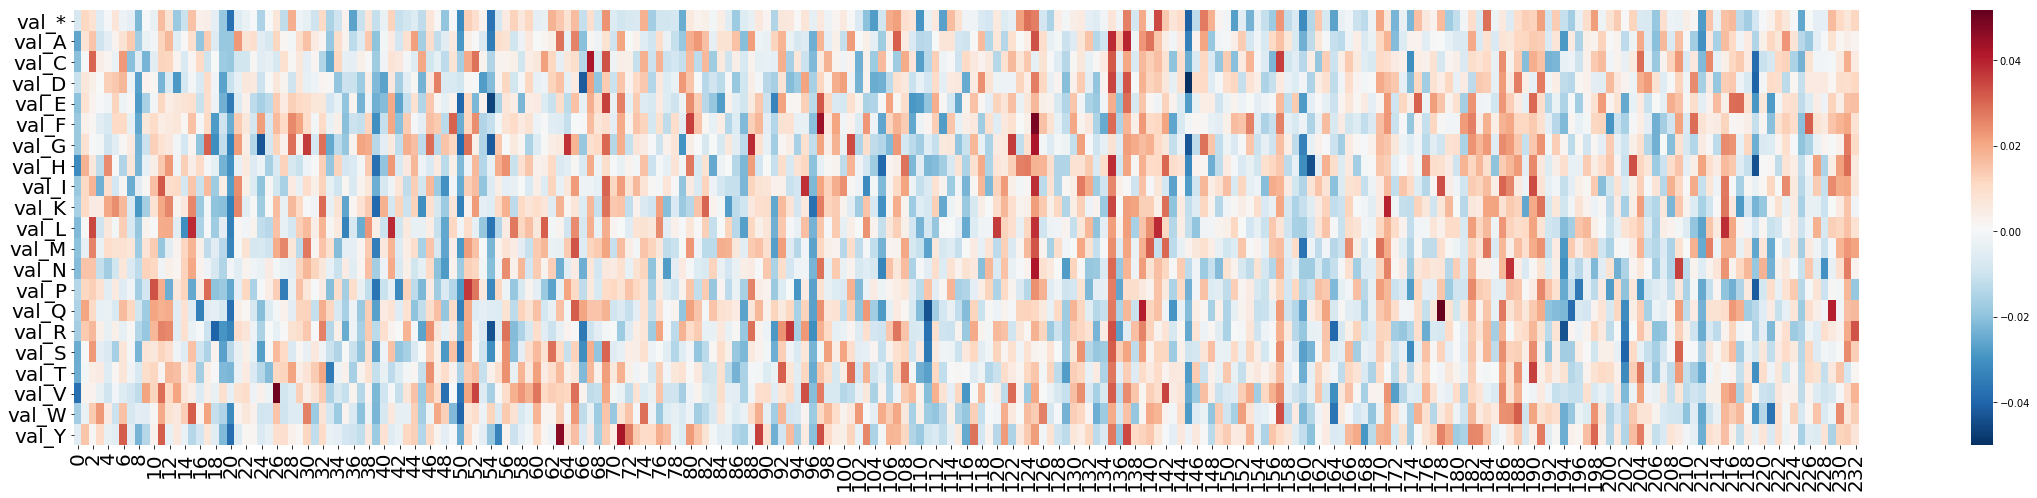

In [298]:
import seaborn as sns
plt.figure(figsize=[40,8])
ax = sns.heatmap(learned_model_im.T,cmap='RdBu_r')
plt.savefig('learned_model_gfp.pdf')
plt.tick_params(labelsize=20)
plt.show()

In [299]:
os.getcwd()

'/Users/tareen/Desktop/Desktop_Tests/MPathic3/mpathic/data/rnap_convnet/ANN_Logisitc_Regression/global_epistasis_gfp'

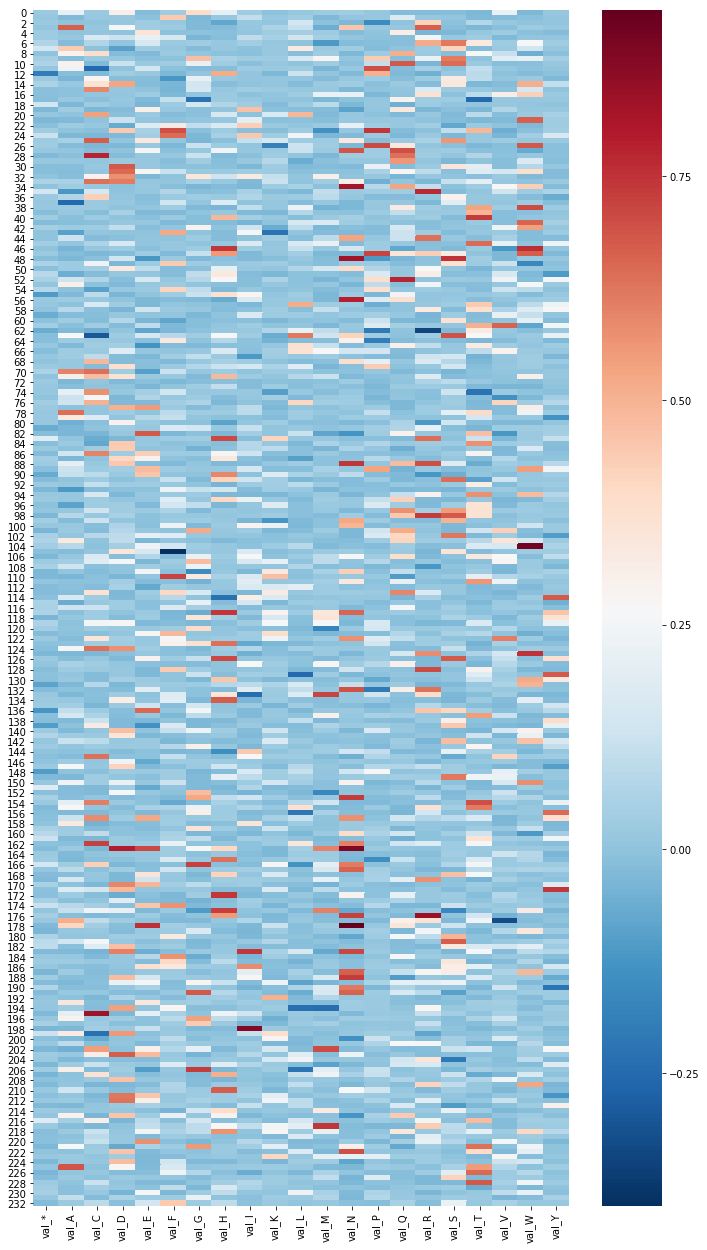

In [79]:
import seaborn as sns
plt.figure(figsize=[12,22])
sns.heatmap(learned_model_im,cmap='RdBu_r')
#plt.savefig('learned_model.png')
plt.show()

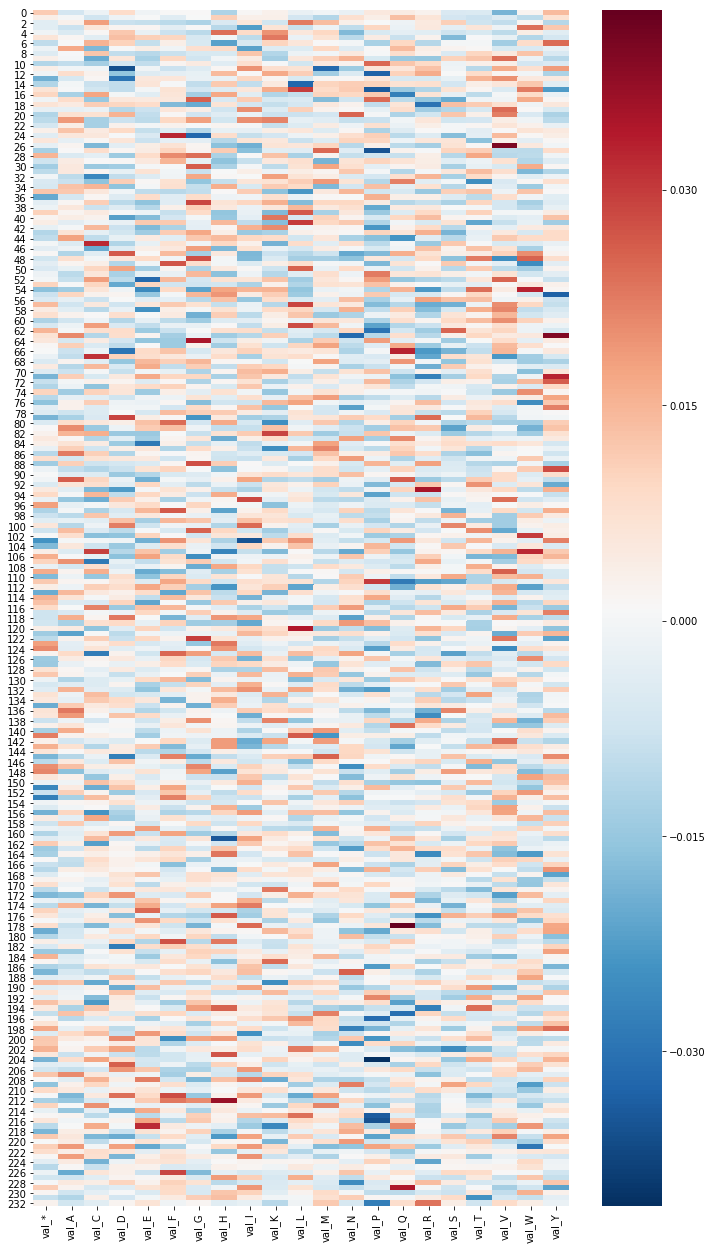

In [283]:
import seaborn as sns
plt.figure(figsize=[12,22])
sns.heatmap(learned_model_im,cmap='RdBu_r')
#plt.savefig('learned_model.png')
plt.show()

In [125]:
row_means_list = []
for mean_index in range(len(learned_model_im)):
    row_means_list.append(np.mean(learned_model_im.loc[mean_index,:]))

In [127]:
for mean_index in range(len(learned_model_im)):
    learned_model_im.loc[mean_index,:] -= row_means_list[mean_index]

In [129]:
learn_model_copy = learned_model_im.copy()

## Evaluate value by hand

In [16]:
x_train = sequences.values

In [17]:
x_train_tensor = np.zeros(list(x_train.shape) + [21])

In [18]:
x_train[0]

'KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELY'

In [117]:
len(x_train)

54025

In [20]:
base_dict = {"K":0, "R":1, "H":2, "E":3, "D":4, "N":5, "Q":6, "T":7, "S":8, "C":9, "G":10, "A":11, "V":12, "L":13, "I":14, "M":15, "P":16, "Y":17, "F":18, "W":19}
base_dict.keys()

dict_keys(['K', 'R', 'H', 'E', 'D', 'N', 'Q', 'T', 'S', 'C', 'G', 'A', 'V', 'L', 'I', 'M', 'P', 'Y', 'F', 'W'])

In [103]:
#def string_vectorizer(strng, alphabet='KRHEDNQTSCGAVLIMPYFW*'):
def string_vectorizer(strng, alphabet='*ACDEFGHIKLMNPQRSTVWY'):
    vector = [[0 if char != letter else 1 for char in alphabet] 
                  for letter in strng]
    return vector

In [71]:
x_train_tensor = np.zeros(list(x_train.shape) + [21])    # shape: (batch_size, 4)
#base_dict = {"K":0, "R":1, "H":2, "E":3, "D":4, "N":5, "Q":6, "T":7, "S":8, "C":9, "G":10, "A":11, "V":12, "L":13, "I":14, "M":15, "P":16, "Y":17, "F":18, "W":19,'*':20}
base_dict = {"*":0, "A":1, "C":2, "D":3, "E":4, "F":5, "G":6, "H":7, "I":8, "K":9, "L":10, "M":11, "N":12, "P":13, "Q":14, "R":15, "S":16, "T":17, "V":18, "W":19,'Y':20}
#val_*	val_A	val_C	val_D	val_E	val_F	val_G	val_H	val_I	val_K	val_L	val_M	val_N	val_P	val_Q	val_R	val_S	val_T	val_V	val_W	val_Y
num_sample = len(x_train_tensor)
seq_length = len(x_train[0])

test_tensor = string_vectorizer(x_train[0])


In [72]:
x_train_tensor_list = []
for train_index in range(len(x_train)):
    x_train_tensor_list.append(string_vectorizer(x_train[train_index]))
    

In [73]:
np.shape(x_train_tensor_list)

(54025, 233, 21)

In [104]:
additive_trait = []
for evaluate_index in range(len(x_train)):
    #additive_trait.append(np.sum(np.sum(learned_model_im.values*x_train_tensor_list[evaluate_index])))
    additive_trait.append(np.sum(np.sum(learned_model_im.values*x_train_tensor_list[evaluate_index])))

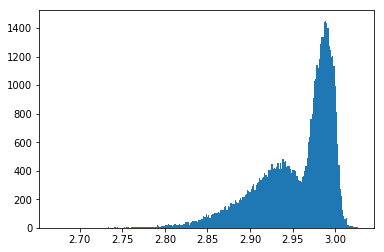

In [135]:
plt.hist(additive_trait,bins=250)
plt.show()

## end evaluate by hand

In [57]:
np.shape(learn_model_copy)

(233, 21)

## reweight model

~~Divided all weights by square root of the sum of the squares of all weights~~

In [130]:
rescale_weight = np.sum(np.sum(np.square(learn_model_copy)))**0.5
learn_model_copy = learn_model_copy.copy()/rescale_weight

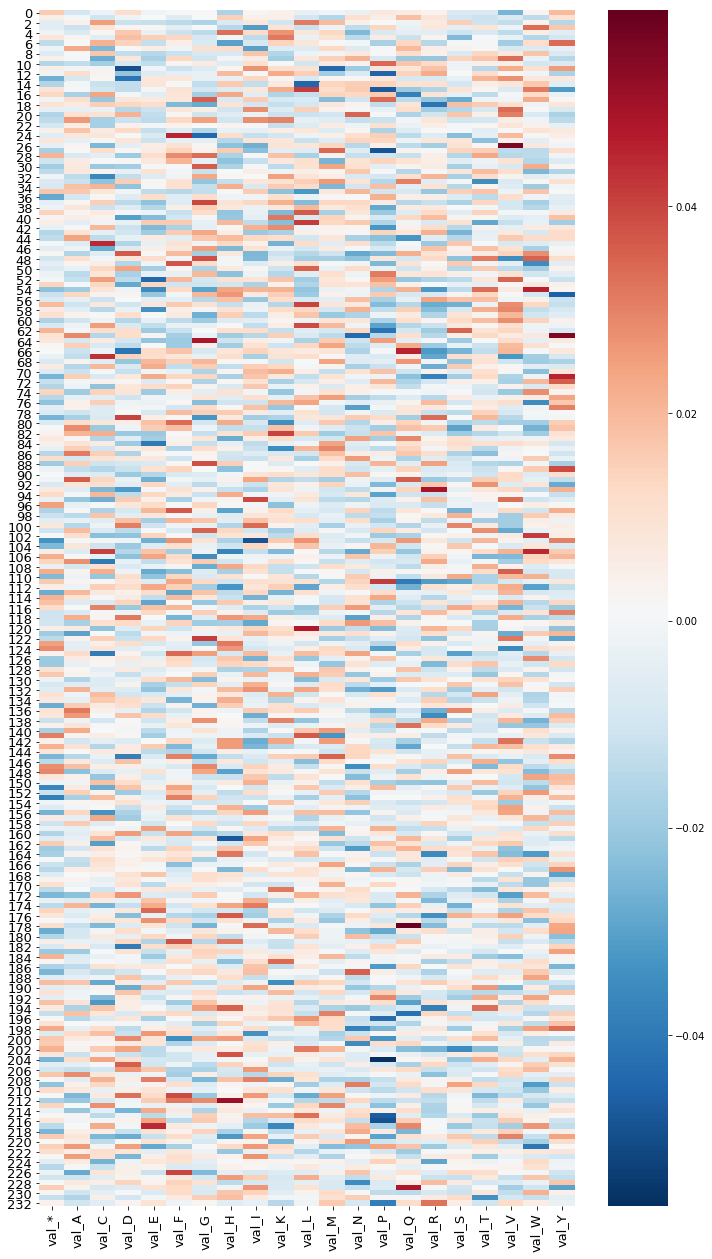

In [131]:
import seaborn as sns
plt.figure(figsize=[12,22])
sns.heatmap(learn_model_copy,cmap='RdBu_r')
plt.tick_params(labelsize=13)
plt.show()

## output model 

In [74]:
learn_model_copy.to_csv('learn_gfp_model_no_spurious_seqs_gf.csv',sep='\t')

# load model weights from train neural network

In [63]:
#type(np.loadtxt('NN_dense_layer_weights.csv', delimiter=','))

numpy.ndarray

# end model visualization

In [14]:
sequences = input_data_ordered_raw['AAsequence']
val = input_data_ordered_raw['medianBrightness']

In [15]:
len(sequences)

54025

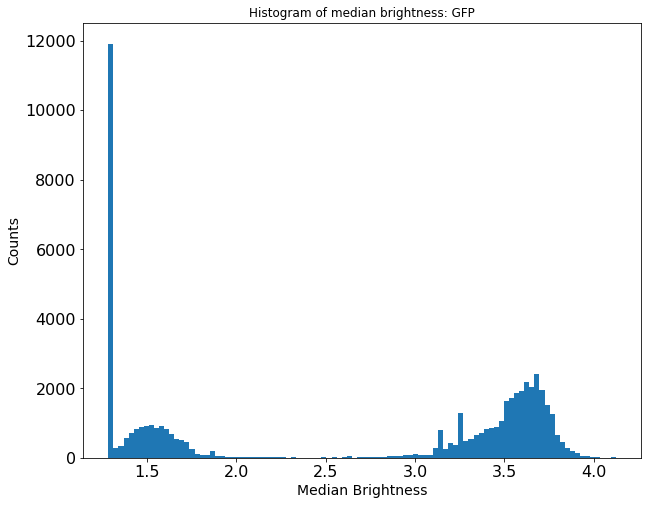

In [6]:
plt.figure(figsize=[10,8])
plt.hist(val,bins=100)
plt.title('Histogram of median brightness: GFP')
plt.xlabel('Median Brightness',fontsize=14)
#plt.xlim([1.2,1.4])
plt.ylabel('Counts',fontsize=14)
plt.tick_params(labelsize=16)
plt.savefig('median_brightness_histogram_gfp.png')
plt.show()

## Check which sequences are clustered around 1.3

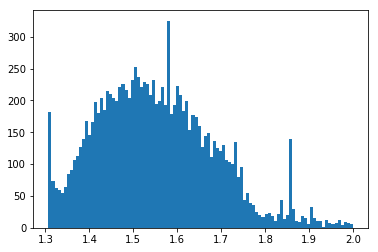

In [10]:
#plt.hist(input_data_ordered_raw.loc[input_data_ordered_raw['medianBrightness']<1.31]['medianBrightness'],bins=100)
plt.hist(input_data_ordered_raw.loc[(input_data_ordered_raw['medianBrightness']>1.307) & (input_data_ordered_raw['medianBrightness']<2.0)]['medianBrightness'],bins=100)
plt.show()

## make dataframe which excludes sequences below value 1.31 

### there are about ~ 10000 of these with the same value

In [12]:
#len(input_data_ordered_raw.loc[input_data_ordered_raw['medianBrightness']>1.31])
len(input_data_ordered_raw.loc[(input_data_ordered_raw['medianBrightness']>1.307) & (input_data_ordered_raw['medianBrightness']<2.0)])


11351

In [14]:
input_df_without_spurious_seqs = input_data_ordered_raw.loc[(input_data_ordered_raw['medianBrightness']>1.307) & (input_data_ordered_raw['medianBrightness']<2.0)].copy()    
#input_df = input_data_ordered_raw.copy()

In [15]:
input_df_without_spurious_seqs.head()
#input_df.head()

,AAsequence,HammingDistance,aaMutations,medianBrightness,std
6,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,5,SA108G:SK154E:SF163S:SL192Q:SL193P,1.499573,NaN
19,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,5,SA108T:SK129E:SS145C:SE170G:ST184S,1.318630,NaN
22,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,4,SA108T:SV110G:SE140G:SK207N,1.383828,NaN
23,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,4,SA108V:SE109D:SN210S:SD232N,1.661894,NaN
25,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,2,SA108V:SI150V,1.450932,NaN


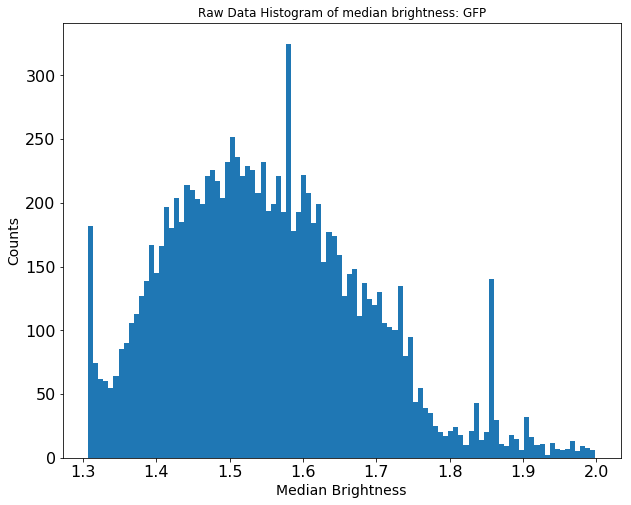

In [17]:
plt.figure(figsize=[10,8])
#plt.hist(input_data_ordered_raw['medianBrightness'],bins=100)
plt.hist(input_df_without_spurious_seqs['medianBrightness'],bins=100)
plt.title('Raw Data Histogram of median brightness: GFP')
plt.xlabel('Median Brightness',fontsize=14)
#plt.xlim([1.2,1.4])
plt.ylabel('Counts',fontsize=14)
plt.tick_params(labelsize=16)
#plt.savefig('raw_median_brightness_histogram_gfp.png')
plt.show()

In [18]:
sequences = input_df_without_spurious_seqs['AAsequence']
val = input_df_without_spurious_seqs['medianBrightness']

#sequences = input_df['AAsequence']
#val = input_df['medianBrightness']

In [19]:
len(val)

11351

In [20]:
gfp_df = pd.DataFrame({'seq':sequences,'val':val})

In [21]:
from scipy.stats import percentileofscore

# generate example data
arr = gfp_df['val']

# pre-sort array
arr_sorted =  sorted(arr)

# calculate percentiles using scipy func percentileofscore on each array element
s = pd.Series(arr)
percentiles = s.apply(lambda x: percentileofscore(arr_sorted, x))

/Users/tareen/Library/Python/3.6/lib/python/site-packages/scipy/stats/stats.py:1792: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pct = (np.mean(a_len[idx]) / n) * 100.0


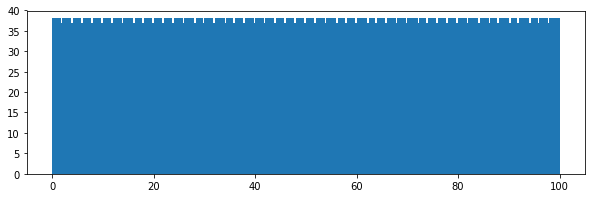

In [22]:
#plt.hist(arr,bins=50)
plt.figure(figsize=[10,3])
plt.hist(percentiles,bins=300)
plt.show()

In [19]:
gfp_df.head()

,seq,val
0,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,3.719212
4,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,3.708478
5,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,3.582764
6,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1.499573
7,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,3.659013


In [23]:
len(gfp_df)

11351

In [24]:
gfp_df['percentiles'] = percentiles

In [62]:
gfp_df.head()

,seq,val,percentiles
6,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1.499573,37.838076
19,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1.318630,2.158400
22,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1.383828,9.100520
23,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1.661894,80.072240
25,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1.450932,24.579332


In [63]:
gfp_df.to_csv('gfp_seq_val_percentiles_no_spurious_seqs.csv',sep='\t')
#gfp_df.to_csv('gfp_seq_val_percentiles.csv',sep='\t')

## Load dataframe with percentiles

In [109]:
#gfp_df_percentiles = pd.read_csv('gfp_seq_val_percentiles_no_spurious_seqs.csv')
gfp_df_percentiles = pd.read_csv('gfp_seq_val_percentiles.csv')
del gfp_df_percentiles['Unnamed: 0']

#gfp_df_percentiles = gfp_df.copy()

gfp_df_percentiles.head()

,seq,val,percentiles,additive_trait,additive_trait_NN
0,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,3.719212,90.663582,3.602172,17.800454
1,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1.301030,6.906062,3.602172,18.016554
2,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1.301031,13.227210,3.602172,18.327824
3,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1.301189,16.908839,3.602172,17.609564
4,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,3.708478,89.378991,3.602172,18.236554


In [110]:
len(gfp_df_percentiles)

54026

In [111]:
len(gfp_df_percentiles['val'][0:54025])

54025

In [11]:
gfp_df_percentiles = gfp_df_percentiles.dropna()

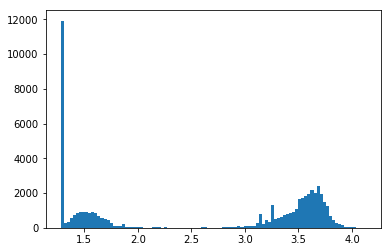

In [82]:
plt.hist(gfp_df_percentiles['val'],bins=100)
plt.show()

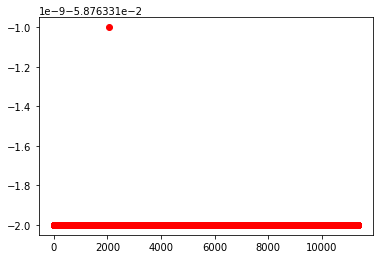

In [86]:
plt.plot(gfp_df_percentiles['additive_trait'],'ro')
plt.show()

In [90]:
np.var(gfp_df_percentiles['additive_trait'])

8.809020481549411e-23

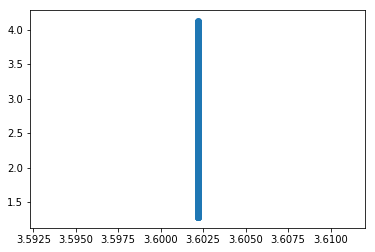

In [83]:
#plt.scatter(gfp_df_percentiles.loc[gfp_df_percentiles['additive_trait']<0.825169]['additive_trait'],gfp_df_percentiles.loc[gfp_df_percentiles['additive_trait']<0.825169]['val'])
#plt.scatter(gfp_df_percentiles.loc[gfp_df_percentiles['val']>1.31]['additive_trait'],gfp_df_percentiles.loc[gfp_df_percentiles['val']>1.31]['val'])
plt.scatter(gfp_df_percentiles['additive_trait'],gfp_df_percentiles['val'])
#plt.ylim([1.2,1.4])
plt.show()

In [31]:
len(gfp_df_percentiles['val'])

11351

In [83]:
len(gfp_df_percentiles.loc[gfp_df_percentiles['additive_trait']<0.825169])

11351

In [275]:
len(additive_trait)

11351

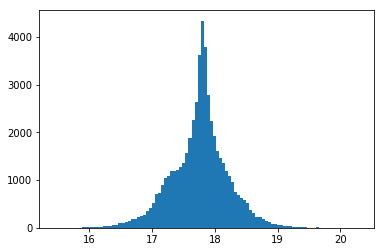

In [99]:
plt.hist(gfp_df_percentiles['additive_trait_NN'],bins=100)
plt.show()

## Load/visualize global episistasis

### predictive info for GFP: 0.9428641578036139 using info max

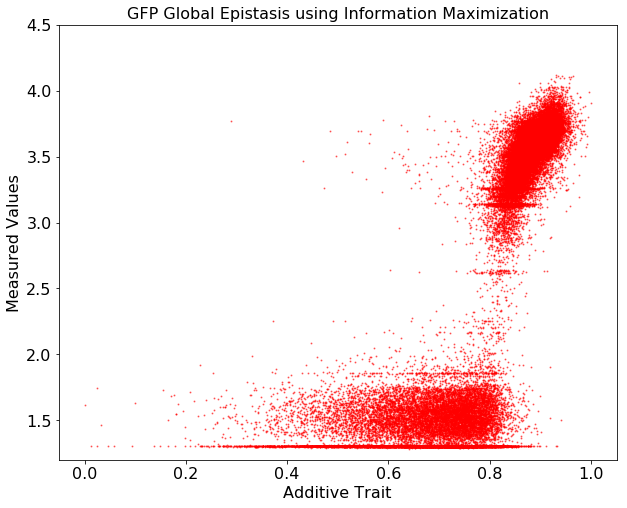

In [270]:
from scipy.signal import convolve

plt.figure(figsize=[10,8])
#plt.scatter(gfp_df_percentiles['additive_trait'],gfp_df_percentiles['val'],s=0.5,color='red',alpha=0.25)
#plt.scatter(gfp_df_percentiles.loc[gfp_df_percentiles['additive_trait']<0.825169]['additive_trait'],gfp_df_percentiles.loc[gfp_df_percentiles['additive_trait']<0.825169]['val'],s=20.0,color='red')
#plt.scatter(gfp_df_percentiles['additive_trait_NN'],gfp_df_percentiles['val'],color='red',s=1,alpha=0.5)
#plt.scatter(np.array(additive_trait),gfp_df_percentiles['val'][0:54025],color='red',alpha=0.5,s=1)

additive_trait = np.array(additive_trait)
additive_trait_scaled = (additive_trait-min(additive_trait))/(max(additive_trait)-min(additive_trait))

plt.scatter(additive_trait_scaled,input_data_ordered_raw['medianBrightness'],color='red',alpha=0.5,s=1)

x = np.array(additive_trait_scaled)
y = input_data_ordered_raw['medianBrightness']


plt.ylim(1.2,4.5)
plt.xlabel('Additive Trait',fontsize=16)
plt.ylabel('Measured Values',fontsize=16)
plt.title('GFP Global Epistasis using Information Maximization',fontsize=16)

plt.tick_params(labelsize=16)
#plt.savefig('GFP_global_epistasis_MI_max.png')
plt.show()

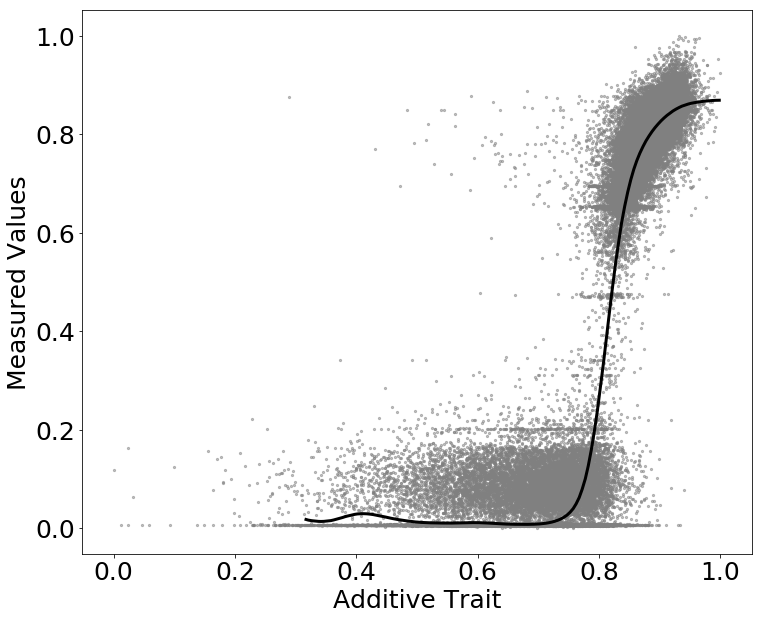

In [282]:
# aggregate
# https://stackoverflow.com/questions/23217851/running-median-of-y-values-over-a-range-of-x
# smoothing: 
# https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
import pandas as pd
from scipy.ndimage.filters import gaussian_filter1d
#df = pd.DataFrame({'X' : x, 'Y' : y})  #we build a dataframe from the data
y_scaled = (y-min(y))/(max(y)-min(y))
df = pd.DataFrame({'X' : x, 'Y' : y_scaled})  #we build a dataframe from the data

data_cut = pd.cut(df.X,200)           #we cut the data following the bins
grp = df.groupby(by = data_cut)        #we group the data by the cut

ret = grp.aggregate(np.median)         #we produce an aggregate representation (median) of each bin

#plotting
plt.figure(figsize=[12,10])
plt.scatter(df.X,df.Y,color='gray',alpha=.5,s=5)
ysmoothed = gaussian_filter1d(ret.Y, sigma=5)
#plt.plot(ret.X,ret.Y,'ro',lw=2,alpha=.5,)
plt.plot(ret.X, ysmoothed,lw=3,color='black')


plt.xlabel('Additive Trait',fontsize=25)
plt.ylabel('Measured Values',fontsize=25)
#plt.title('GFP Global Epistasis using Information Maximization',fontsize=16)
plt.tick_params(labelsize=25)
plt.savefig('gfp_IM_max_smoothed_line_scaled_for_talk.png')



plt.show()

/Users/tareen/Library/Python/3.6/lib/python/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/tareen/Library/Python/3.6/lib/python/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'figsize'
  s)


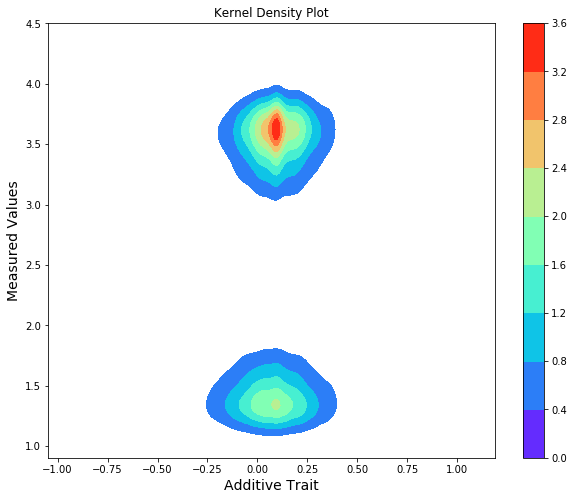

In [34]:
figure_size = [10,8]
plt.figure(figsize=figure_size)

ax = sns.kdeplot(additive_trait, gfp_df_percentiles['val'],figsize=[10,8],gridsize=200, shade = True, cmap = "rainbow",cbar=True)
#ax.patch.set_facecolor('white')
ax.collections[0].set_alpha(0.0)
ax.set_xlabel('Additive Trait', fontsize = 14)
ax.set_ylabel('Measured Values', fontsize = 14)
ax.set_title('Kernel Density Plot')
#plt.xlim(-0.7, -0.2)
#figure_size = [10,8]
#plt.figure(figsize=figure_size)
#plt.ylim([-8, 0.05])
#plt.scatter(-rna_linear_trait_scaled,np.log(rna_true_labels),s=1,alpha=0.25,color='gray', zorder=1)
plt.show()

## end load/visualize global episistasis

In [32]:
len(gfp_df_percentiles)

11351

In [33]:
val_scaled = gfp_df_percentiles['percentiles']
#val_scaled = (val_scaled-min(val_scaled))/(max(val_scaled)-min(val_scaled))
gfp_df_percentiles['val_scaled'] = val_scaled

In [34]:
bins_to_use = 20
#counts,bins = np.histogram(gb1_df_10k['val'],bins=bins_to_use)
counts,bins = np.histogram(val_scaled,bins=bins_to_use)

In [35]:
bins

array([8.80979649e-03, 5.00836931e+00, 1.00079288e+01, 1.50074883e+01,
       2.00070478e+01, 2.50066073e+01, 3.00061669e+01, 3.50057264e+01,
       4.00052859e+01, 4.50048454e+01, 5.00044049e+01, 5.50039644e+01,
       6.00035239e+01, 6.50030834e+01, 7.00026429e+01, 7.50022024e+01,
       8.00017620e+01, 8.50013215e+01, 9.00008810e+01, 9.50004405e+01,
       1.00000000e+02])

In [36]:
#temp_df = gb1_df_10k[].copy()
temp_df = gfp_df_percentiles.copy()

In [37]:
len(temp_df['val_scaled'])

11351

In [38]:
for bin_index in range(len(bins)):
    if(bin_index<len(bins)-1):
        print(bin_index,bins[bin_index],bins[bin_index+1])     

0 0.008809796493700995 5.008369306669016
1 5.008369306669016 10.00792881684433
2 10.00792881684433 15.007488327019646
3 15.007488327019646 20.00704783719496
4 20.00704783719496 25.006607347370277
5 25.006607347370277 30.00616685754559
6 30.00616685754559 35.005726367720904
7 35.005726367720904 40.00528587789622
8 40.00528587789622 45.00484538807154
9 45.00484538807154 50.004404898246854
10 50.004404898246854 55.00396440842216
11 55.00396440842216 60.00352391859748
12 60.00352391859748 65.0030834287728
13 65.0030834287728 70.00264293894811
14 70.00264293894811 75.00220244912343
15 75.00220244912343 80.00176195929875
16 80.00176195929875 85.00132146947406
17 85.00132146947406 90.00088097964938
18 90.00088097964938 95.0004404898247
19 95.0004404898247 100.0


## Get sequences and bin numbers

In [39]:
sequence_bins_list = []
# loop over every sequence
for index, row in temp_df.iterrows():
    # for each row, put sequences in the correct bin based on comparing values to bins
    #print(index,row['seq'], row['val'])
    for bin_index in range(len(bins)):
        if(bin_index<len(bins)-1): # do go out of bounds
            if((row['val_scaled']>= bins[bin_index]) and (row['val_scaled']<=bins[bin_index+1])):
                #print('Seq: ',row['seq'],' going in bin: ',bin_index)
                sequence_bins_list.append([row['seq'],bin_index])
                
                

In [40]:
sequence_counts_array = np.array(sequence_bins_list)

## deal with repeated sequences

In [44]:
import collections
print( [item for item, count in collections.Counter(sequence_counts_array[:,0]).items() if count > 1])
sequences_with_extra_counts = [item for item, count in collections.Counter(sequence_counts_array[:,0]).items() if count > 1]

['KGEELFTGVVPILVELDGVVNGHKFSVSGEGEGDATYGKLTLKFICTTGRLPVPRPTLATTLSYGVQCLSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQRNGIKVNSKIRHNIEDGSVQLADHYQQSTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELY', 'KGEELSTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEEEFEGDTNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELY', 'KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEDYVQERTIFFKDDGNYKTRAEVKFEGDTNRIELKGIDFKEDGNILGHKLEYNYNSHSVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELY', 'KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTPKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPVGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELF', 'KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTAGK

In [45]:
#len(set(list(sequence_counts_array[:,0])))
duplicate_seq_indexes_list = []
for duplicate_index in range(len(sequences_with_extra_counts)):
    print(list(sequence_counts_array[:,0]).index(sequences_with_extra_counts[duplicate_index]))
    duplicate_seq_indexes_list.append(list(sequence_counts_array[:,0]).index(sequences_with_extra_counts[duplicate_index]))

691
3024
3851
6668
9035
9094
9715


In [46]:
len(pd.unique(sequence_counts_array[:,0]))

11351

In [47]:
sequence_counts_array = np.delete(sequence_counts_array, duplicate_seq_indexes_list, axis=0).copy()

In [48]:
len(sequences_with_extra_counts)

7

In [49]:
len(sequence_counts_array)

11351

In [50]:
sequence_counts_array[:,1]
seq_bin_df = pd.DataFrame({'seq':sequence_counts_array[:,0],'bin':sequence_counts_array[:,1]})
seq_bin_df.head()

,bin,seq
0,7,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
1,0,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
2,1,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
3,16,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
4,4,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...


In [51]:
len(seq_bin_df)

11351

In [52]:
print(min(sequence_counts_array[:,1].astype('int')))
print(max(sequence_counts_array[:,1].astype('int')))

0
19


In [53]:
count_cols = []
for bin_index in range(len(bins)-1):
    count_cols.append('ct_'+str(bin_index))

In [54]:
count_cols

['ct_0',
 'ct_1',
 'ct_2',
 'ct_3',
 'ct_4',
 'ct_5',
 'ct_6',
 'ct_7',
 'ct_8',
 'ct_9',
 'ct_10',
 'ct_11',
 'ct_12',
 'ct_13',
 'ct_14',
 'ct_15',
 'ct_16',
 'ct_17',
 'ct_18',
 'ct_19']

In [55]:
# append count columns to the dataframe
#c ount_cols are ['ct_0','ct_1','ct_2','ct_3','ct_4','ct_5','ct_6','ct_7','ct_8','ct_9'] for bins = 10
d = dict.fromkeys(count_cols, 0)
seq_counts_df = seq_bin_df.assign(**d).copy()

In [56]:
seq_counts_df.head()

,bin,seq,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,...,ct_10,ct_11,ct_12,ct_13,ct_14,ct_15,ct_16,ct_17,ct_18,ct_19
0,7,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
seq_counts_df = seq_counts_df.copy()
seq_counts_df.reset_index(inplace=True)
del seq_counts_df['index']
seq_counts_df.head()

,bin,seq,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,...,ct_10,ct_11,ct_12,ct_13,ct_14,ct_15,ct_16,ct_17,ct_18,ct_19
0,7,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
len(seq_counts_df)

11351

## populate counts columns

In [59]:
number_cols_to_displace = 2

for row_index in range(len(seq_counts_df['bin'])):
    count_col = seq_counts_df.columns[int(seq_counts_df['bin'][row_index])+number_cols_to_displace]
    seq_counts_df.loc[row_index,count_col] = 1

    

In [60]:
seq_counts_df.head()

,bin,seq,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,...,ct_10,ct_11,ct_12,ct_13,ct_14,ct_15,ct_16,ct_17,ct_18,ct_19
0,7,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
len(seq_counts_df)

42150

In [61]:
seq_counts_df.to_csv('gfp_input_to_mpathic_no_spurious_seqs.csv',sep='\t')
#seq_counts_df.to_csv('gfp_input_to_mpathic.csv',sep='\t')

In [99]:
sys.path.insert(0,'/Users/tareen/Desktop/Desktop_Tests/Logomaker3')

In [100]:
import logomaker

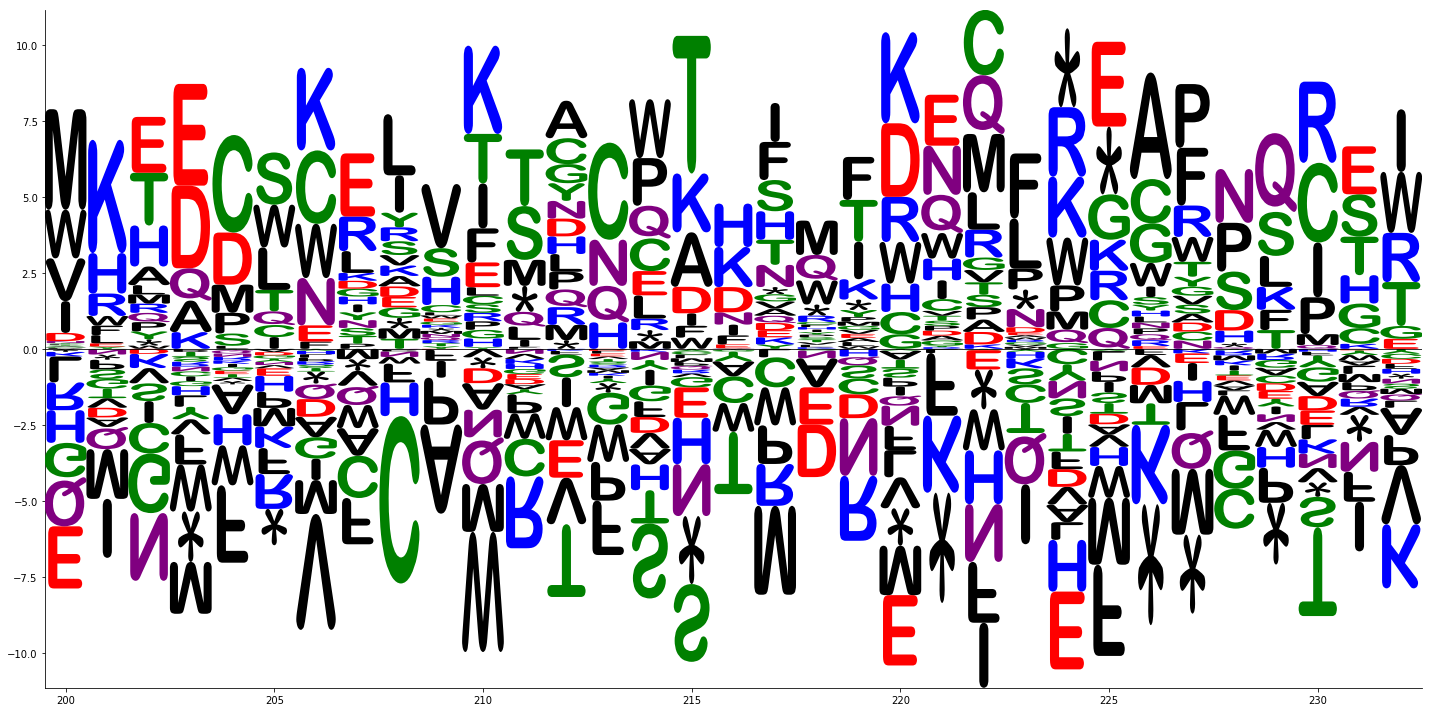

In [144]:
import warnings
warnings.filterwarnings("ignore")

#logo_df = learned_model_im.copy()

character_style_param_dict = {'character_colors':'chemistry'}

learned_model_df = pd.read_csv('learned_model.txt',delim_whitespace=True)
#logo = logomaker.make_logo(dataframe=counts_mat,draw_now=False)

logo = logomaker.make_logo(dataframe=learned_model_df.loc[200:233],
                           character_style_dict = character_style_param_dict,
                           draw_now=False)

fig, ax = plt.subplots(figsize=[20,10])

#mpl.rcParams['font.size'] = 30
#ax.xaxis.set_major_formatter(FormatStrFormatter('%+d'))

ax.tick_params
#ax.set_ylabel('Alpha helix poxition')
#ax.set_xlabel('Contribution to DBF model')

logo.draw(ax)
fig.savefig('gfp_logo/logo_200_233.png')
plt.show()






In [127]:
learned_model_df.head()

,Position,*,A,C,D,E,F,G,H,I,...,M,N,P,Q,R,S,T,V,W,Y
0,0,0.017129,-0.209318,-0.134703,-0.059435,0.017129,0.350647,0.107965,-0.367156,-0.196341,...,0.017129,0.017129,-0.174748,0.017129,0.017129,-0.258558,0.017129,0.313953,0.128870,0.015700
1,1,0.254157,-0.021206,-0.021206,-0.021206,-0.130166,-0.079345,-0.021206,-0.221929,0.057853,...,0.156514,-0.133883,0.189166,0.156378,-0.230324,-0.021206,0.231693,-0.154519,-0.456214,-0.038560
2,2,0.085051,0.085051,-0.042857,0.085051,0.085051,0.151180,0.085051,-0.264319,-0.531397,...,0.065751,-0.072036,0.504441,-0.373200,0.065348,-0.259363,0.090396,0.085051,-0.025838,0.085221
3,3,0.062935,0.062935,0.081495,0.062935,0.062935,0.046103,0.062935,0.080540,0.047081,...,-0.373209,0.275357,-0.056582,0.062935,-0.230189,0.248177,-0.331294,0.062935,-0.219642,0.061765
4,4,-0.008677,0.211276,-0.046736,-0.117722,0.643869,-0.435465,-0.013850,0.013170,-0.004622,...,0.018080,-0.212819,0.018080,0.018080,0.018080,0.018080,0.058707,0.018080,0.281987,0.018919


In [185]:
learned_model_df_T = learned_model_df.T.copy()
learned_model_df_T.loc[:,:]
max_chars = list(learned_model_df_T.drop('Position').idxmax(axis=0).values)

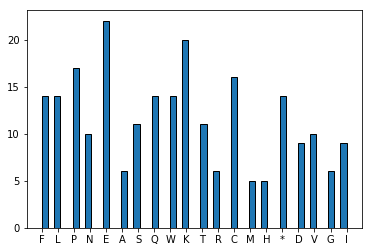

In [188]:
plt.hist(max_chars,edgecolor='black',bins=50)
plt.show()

In [196]:
abs(learned_model_df_T.drop('Position'))

,0,1,2,3,4,5,6,7,8,9,...,223,224,225,226,227,228,229,230,231,232
*,0.017129,0.254157,0.085051,0.062935,0.008677,0.303038,0.086058,0.020676,0.213974,0.022510,...,0.639666,2.596373,2.232311,3.979465,2.598532,0.143429,2.031637,0.473345,0.886774,0.163752
A,0.209318,0.021206,0.085051,0.062935,0.211276,0.323552,0.064715,0.109007,0.052185,0.028843,...,0.077499,0.582075,0.348370,3.505381,0.295092,0.164988,0.255179,0.473345,0.177435,0.896769
C,0.134703,0.021206,0.042857,0.081495,0.046736,0.014872,0.388938,0.006444,0.201319,0.166587,...,0.610790,0.508962,0.912823,1.454824,0.295092,1.311267,0.255179,2.620855,0.517953,0.163752
D,0.059435,0.021206,0.085051,0.062935,0.117722,0.014872,0.210640,0.513734,0.368887,0.078939,...,0.179725,0.582075,0.348370,0.568718,0.295092,0.672548,0.255179,0.473345,0.048062,0.163752
E,0.017129,0.130166,0.085051,0.062935,0.643869,0.033528,0.323459,0.012655,0.052185,0.028843,...,0.077499,2.560416,2.789491,0.089584,0.316756,0.164988,0.255179,0.473345,1.578197,0.331068
F,0.350647,0.079345,0.151180,0.046103,0.435465,0.014872,0.544118,0.598342,0.120470,0.169733,...,2.141046,0.582075,3.001521,0.202149,1.899232,1.171433,0.666804,0.120110,0.985949,0.163752
G,0.107965,0.021206,0.085051,0.062935,0.013850,0.158662,0.425279,0.012655,0.052185,0.028843,...,0.077499,0.189873,1.490881,1.304067,0.295092,1.263840,0.255179,0.473345,0.807719,0.422741
H,0.367156,0.221929,0.264319,0.080540,0.013170,0.014872,0.192261,0.233149,0.300346,0.095325,...,0.211856,1.700840,0.630703,0.195040,0.698298,0.398909,0.685085,0.093985,0.934163,0.163752
I,0.196341,0.057853,0.531397,0.047081,0.004622,0.014872,0.064715,0.719070,0.336214,0.151588,...,1.971423,0.582075,0.348370,0.348426,0.586118,0.164988,0.255179,1.805717,1.633943,2.059076
K,0.017129,0.036742,0.085051,0.062935,0.514597,0.176212,0.254530,0.412627,0.090721,0.218804,...,0.336103,2.004154,1.022404,2.613952,0.148388,0.164988,0.756825,0.473345,0.165714,2.109122


In [190]:
temp_df_model = learned_model_df_T.drop('Position').copy()

In [203]:
abs(temp_df_model.loc[:,2])

*    0.085051
A    0.085051
C    0.042857
D    0.085051
E    0.085051
F    0.151180
G    0.085051
H    0.264319
I    0.531397
K    0.085051
L    0.011318
M    0.065751
N    0.072036
P    0.504441
Q    0.373200
R    0.065348
S    0.259363
T    0.090396
V    0.085051
W    0.025838
Y    0.085221
Name: 2, dtype: float64